In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

import keras
from keras.layers import Embedding, SimpleRNN, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense

np.set_printoptions(precision=4, suppress=True)


Using TensorFlow backend.


In [4]:
df = pd.read_csv('../data.csv', sep=',', index_col='id')
subjects = ['calculus', 'algebra', 'discrete', 'ode', 'complex', 'mechanics',
            'prob_and_stat', 'pde', 'functional', 'optimization', 'random_proc', 'numerical']
df['mean'] = df[subjects].mean(axis=1)
df['round'] = np.rint(df['mean'].values)
df['k'] = [0.8] * 20 + [0.5] * 20 + [0.3] * 20 + [0.3] * 20 + [0.3] * 20


In [5]:
train_df = df[:-40].copy()

x = train_df[['k', 'ege']].values
y = train_df['round'].values - 3

x_optional = np.array([
    [0.8, 243], [0.8, 239], [0.8, 237], [0.8, 235], [0.8, 234], [0.8, 233], [0.8, 232], [0.8, 231], 
    [0.8, 230], [0.8, 229], [0.8, 228], [0.8, 227], [0.8, 226], [0.8, 225], [0.8, 224], [0.8, 223], 
    [0.8, 222], [0.8, 221], [0.8, 220], [0.8, 219], 
    [0.5, 235], [0.5, 220], [0.5, 218], [0.5, 217], [0.5, 215], [0.5, 214], [0.5, 213], [0.5, 210], 
    [0.5, 209], [0.5, 207], [0.5, 206], [0.5, 205], [0.5, 203], [0.5, 200], [0.5, 199], [0.5, 195], 
    [0.5, 193], [0.5, 192], [0.5, 191], [0.5, 190], 
    [0.3, 244], [0.3, 222], [0.3, 215], [0.3, 213], [0.3, 211], [0.3, 209], [0.3, 206], [0.3, 205], 
    [0.3, 204], [0.3, 203], [0.3, 202], [0.3, 201], [0.3, 200], [0.3, 199], [0.3, 197], [0.3, 196], 
    [0.3, 194], [0.3, 193], [0.3, 191], [0.3, 191]
])
y_optional = np.array([
    2,2,2,2,2,2,1,1,1,1,1,1,1,1,0,0,0,0,0,0,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,0,0,0,0,0,2,2,2,1,1,1,1,
    1,1,1,1,1,1,1,1,0,0,0,0,0])

x = np.concatenate((x, x_optional), axis=0)
y = np.concatenate((y, y_optional), axis=0)


In [6]:
max_features = 1024

model = Sequential()

model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['categorical_accuracy'])



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
one_hot_labels = keras.utils.to_categorical(y, num_classes=3)
history = model.fit(x, one_hot_labels, epochs=100, batch_size=20, verbose=1, shuffle=False)


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
120/120 [==============================] - 1s 6ms/step - loss: 1.0746 - categorical_accuracy: 0.4833
Epoch 2/100
120/120 [==============================] - 0s 532us/step - loss: 1.0655 - categorical_accuracy: 0.4833
Epoch 3/100
120/120 [==============================] - 0s 692us/step - loss: 1.0562 - categorical_accuracy: 0.4833
Epoch 4/100
120/120 [==============================] - 0s 916us/step - loss: 1.0425 - categorical_accuracy: 0.4833
Epoch 5/100
120/120 [==============================] - 0s 1ms/step - loss: 1.0228 - categorical_accuracy: 0.4833
Epoch 6/100
120/120 [==============================] - 0s 899us/step - loss: 0.9956 - categorical_accuracy: 0.4833
Epoch 7/100
120/120 [==============================] - 0s 919us/step - loss: 0.9621 - categorical_accuracy: 0.5333
Epoch 8/100
120/120 [==============================] - 0s 1ms/step - loss: 0.9244 - categorical_accuracy: 0.6333
Epoch 9/100
120/120 [=================

In [11]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy'])


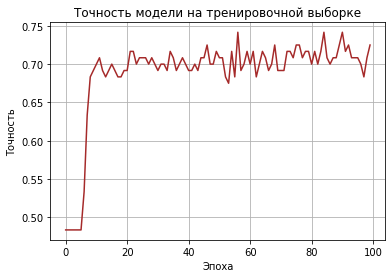

In [8]:
plt.plot(history.history['categorical_accuracy'], color='brown')
plt.grid()
plt.title('Точность модели на тренировочной выборке')
plt.ylabel('Точность')
plt.xlabel('Эпоха')
# plt.savefig('model_acc.png', dpi=300)

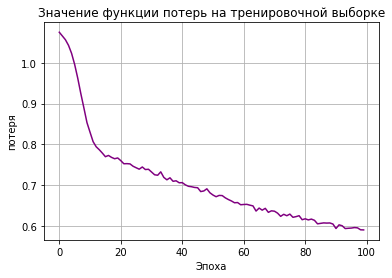

In [9]:
plt.plot(history.history['loss'], color='purple')
plt.grid()
plt.title('Значение функции потерь на тренировочной выборке')
plt.ylabel('потеря')
plt.xlabel('Эпоха')
# plt.savefig('model_loss.png', dpi=300)

#### пронозирование за 16 год


20/20 [==============================] - 0s 9ms/step
[0.8587416708469391, 0.7000000067055225]


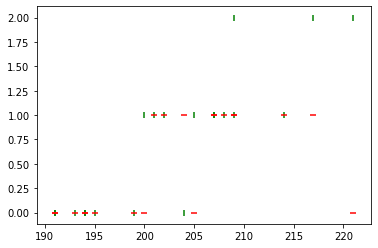

In [14]:
df_16 = df[df['year'] == 16][['ege', 'k', 'round']]
x = df_16[['ege', 'k']].values
y = df_16['round'].values - 3

one_hot_labels = keras.utils.to_categorical(y, num_classes=3)
score = model.evaluate(x, one_hot_labels, batch_size=5)
print(score)


y_predict = model.predict(x)
y_predict = list(map(lambda y : y.argmax(), y_predict))

plt.scatter(x[:, 0], y, marker='|', color='green')
plt.scatter(x[:, 0], y_predict, marker='_', color='red')


#### пронозирование за 17 год


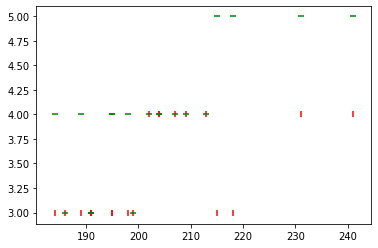

In [15]:
df_17 = df[df['year'] == 17][['ege', 'k', 'round']]
x = df_17[['ege', 'k']].values
y = df_17['round'].values

y_predict = model.predict(x)
y_predict = list(map(lambda y : y.argmax() + 3, y_predict))

plt.scatter(x[:, 0], y_predict, marker='|', color='red')
plt.scatter(x[:, 0], y, marker='_', color='green')
